<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#neXtSIM-outputs-analysis" data-toc-modified-id="neXtSIM-outputs-analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>neXtSIM outputs analysis</a></span><ul class="toc-item"><li><span><a href="#Utils" data-toc-modified-id="Utils-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Utils</a></span></li><li><span><a href="#Make-animation-of-sea-ice-thickness" data-toc-modified-id="Make-animation-of-sea-ice-thickness-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Make animation of sea-ice thickness</a></span></li><li><span><a href="#Make-time-serie-analysis" data-toc-modified-id="Make-time-serie-analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Make time serie analysis</a></span></li></ul></li></ul></div>

# neXtSIM outputs analysis

## Utils

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
import cmocean

from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc

from Utils import make_animation, time_series_plot, time_series_plot2

In [2]:
#Open dataset
data = xr.open_dataset('Moorings_2018m01.nc')
data2 = xr.open_dataset('Moorings_2018m01_thermal_short.nc')

# Extract a given variable
sit_output = data.sit.to_masked_array()
sit_output2 = data2.sit.to_masked_array()

#Get mask

mask = ma.getmaskarray(sit_output[0])
#Get time info
time = data.time.indexes['time']


## Make animation of sea-ice thickness

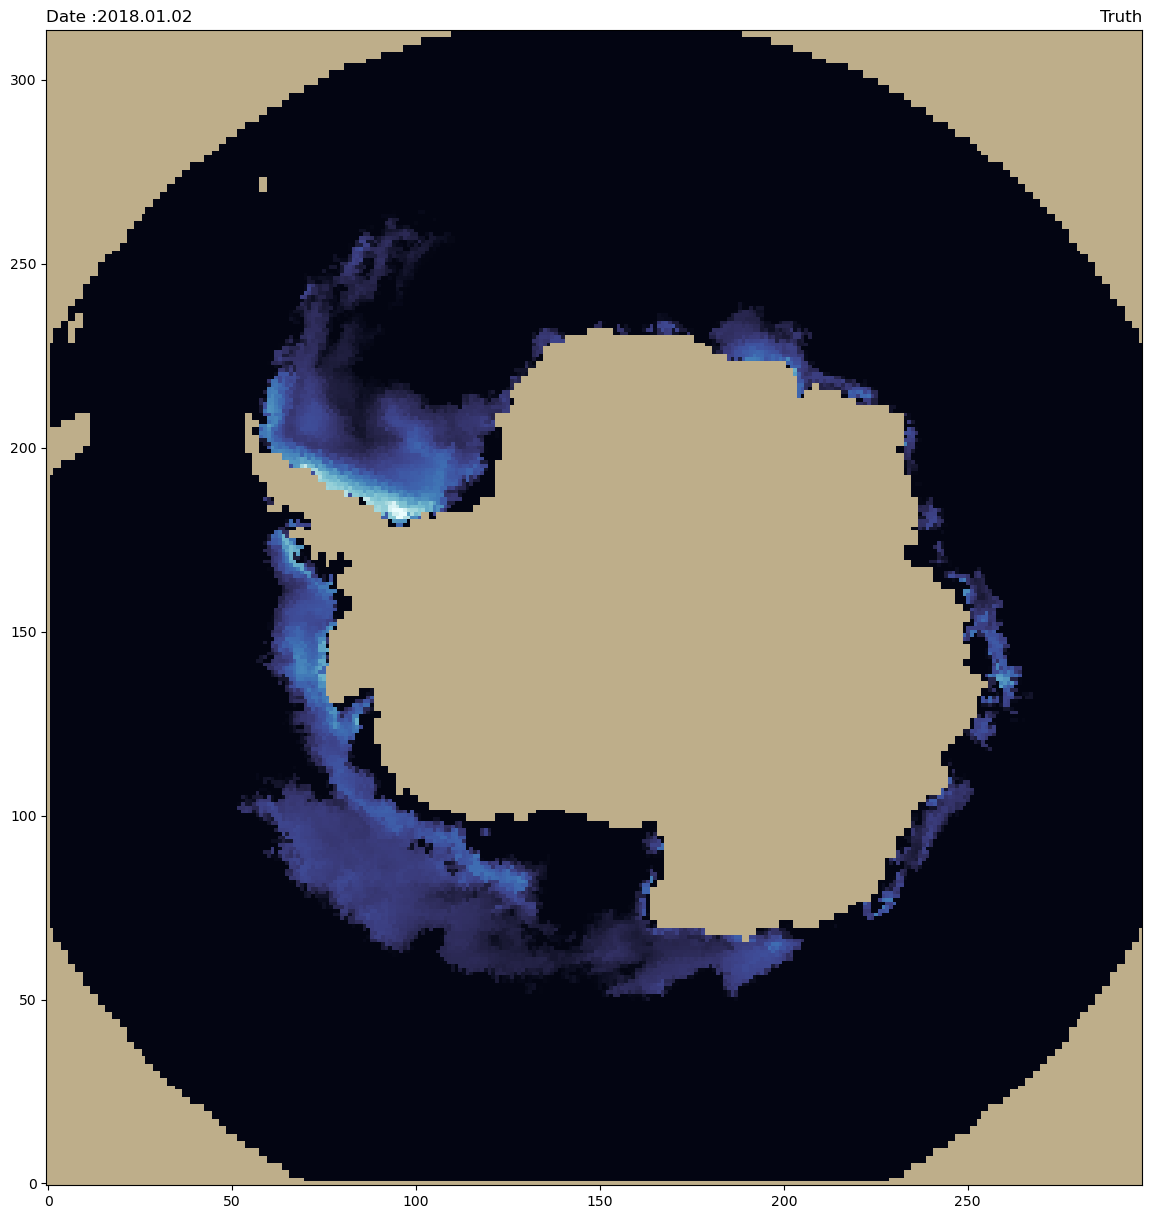

In [3]:
plt.rcParams['animation.ffmpeg_path'] = 'ffmpeg'
anim=make_animation(time=time , mask =1- mask, variable = sit_output)
FFwriter = animation.FFMpegWriter( fps = 12)

#Save animation 
anim.save('sit_no_atm.mp4', writer=FFwriter, dpi = 200)

## Make time serie analysis

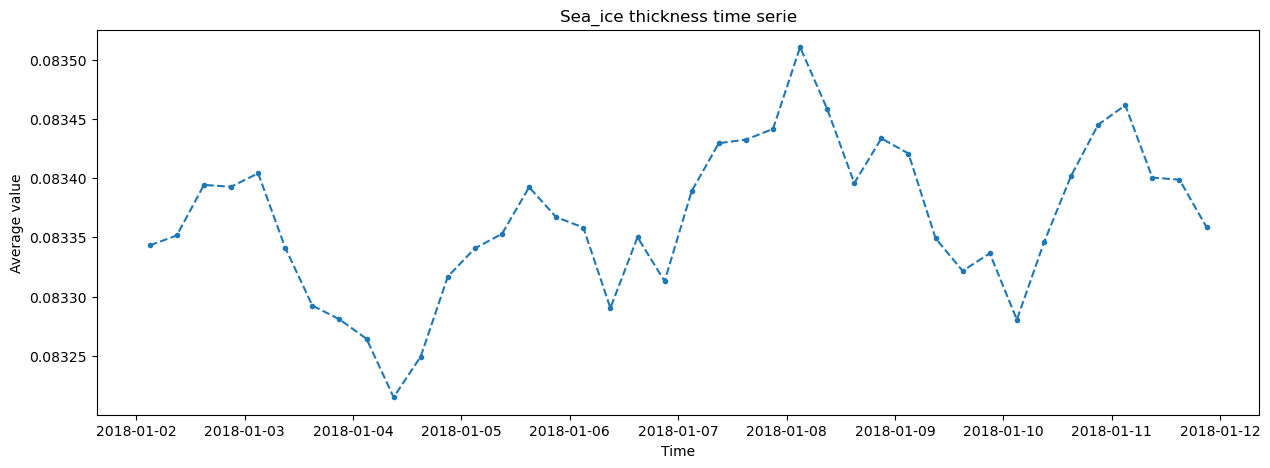

In [6]:
time_series_plot(time, sit_output, mask, 'test', 'Sea_ice thickness time serie')

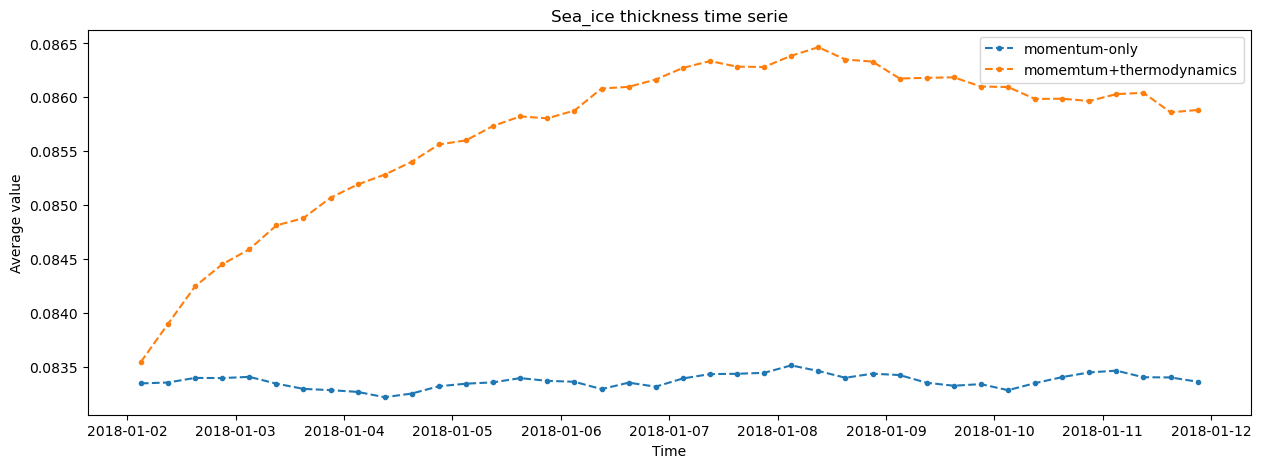

In [7]:
time_series_plot2(time, sit_output, sit_output2, mask, 'test2', 'Sea_ice thickness time serie')